In [1]:
%matplotlib inline

import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

import matplotlib.image as mpimg
from skimage.io import imread, imshow

#Import Tensorflow namespaces
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical


##### Tensorflow GPU ##########

physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

2025-09-26 10:44:02.102397: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-26 10:44:02.115146: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-09-26 10:44:02.118588: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-09-26 10:44:02.129516: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-26 10:44:03.035979: W tensorflow/compiler/tf2

In [2]:
# Import the dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
# Split into features and targets

train_labels = df_train.label.values
test_labels = df_test.label.values

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

X_train = df_train.drop('label',axis=1).values
X_test  = df_test.drop('label',axis=1).values

print(y_train)


[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [4]:
# Principle Component Analysis
number_of_components = 50
from sklearn.decomposition import PCA


pca_model = PCA(n_components=number_of_components, svd_solver='full')
pca_model.fit(X_train)


X_train_pca = pca_model.transform(X_train)
X_test_pca = pca_model.transform(X_test)

# Normalization

X_train_pca = X_train_pca / X_train_pca.max()
X_test_pca = X_test_pca / X_test_pca.max()


In [5]:
# Neural network initialization

activation = 'relu'
dropout_rate = 0.2
kernel_initializer ='uniform'
optimizer = 'adam'
lr = 0.01
batchsize = 32

model = Sequential()
model.add(Dense(50, input_dim=number_of_components, kernel_initializer=kernel_initializer,activation=activation))
model.add(Dropout(dropout_rate))
model.add(Dense(50, kernel_initializer=kernel_initializer,activation=activation))
model.add(Dropout(dropout_rate))
model.add(Dense(10,activation = 'softmax'))


model.compile(loss="categorical_crossentropy", optimizer=optimizer,metrics=['accuracy']) 

/home/mcldwitt/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1758876259.941214   20580 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1758876259.941379   20580 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1758876259.941470   20580 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1758876260.171394   20580 cuda_executor.cc:1001] cou

In [6]:
history = model.fit(X_train_pca, y_train, epochs=10,validation_split=0.33, batch_size=batchsize,verbose=1)

Epoch 1/10


I0000 00:00:1758876261.679413   20688 service.cc:146] XLA service 0x7f282c00cb40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758876261.679451   20688 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-09-26 10:44:21.712417: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-09-26 10:44:21.855264: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


 89/629 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2772 - loss: 2.2788

I0000 00:00:1758876263.059278   20688 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


629/629 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.5393 - loss: 1.6356 - val_accuracy: 0.8602 - val_loss: 0.4989
Epoch 2/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8267 - loss: 0.5497 - val_accuracy: 0.8900 - val_loss: 0.3831
Epoch 3/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8686 - loss: 0.4408 - val_accuracy: 0.9016 - val_loss: 0.3349
Epoch 4/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8814 - loss: 0.3908 - val_accuracy: 0.9117 - val_loss: 0.3026
Epoch 5/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8947 - loss: 0.3590 - val_accuracy: 0.9185 - val_loss: 0.2721
Epoch 6/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8984 - loss: 0.3251 - val_accuracy: 0.9243 - val_loss: 0.2546
Epoch 7/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9123 - loss: 0.2956 - val_accuracy: 0.9327 - val_loss: 0.2317
Epoch 8/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9130 - loss: 0.2902 - val_accuracy: 0.9339 - val_

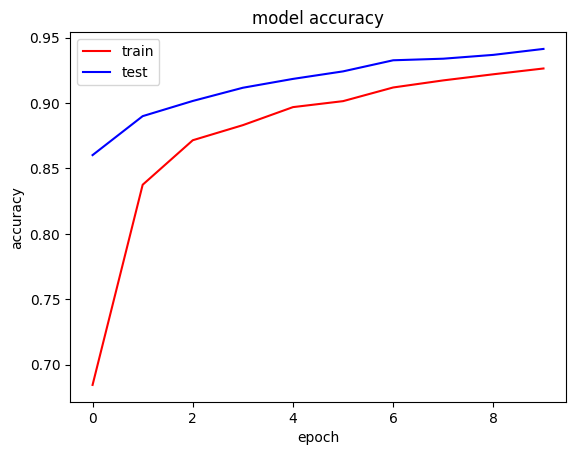

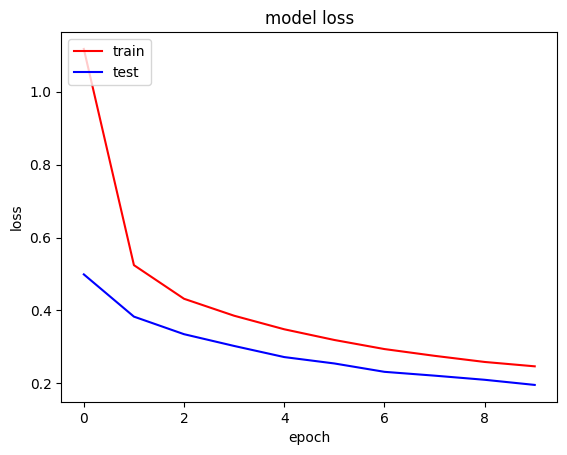

In [7]:
# Plot history

# Accuray 
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Loss 
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
#y_predicted = model.predict_classes(X_test_pca,batch_size=1, verbose=1)
y_predicted = np.argmax(model.predict(X_test_pca),axis=-1)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [9]:
print(y_predicted)

[3 8 0 ... 7 6 9]


In [10]:
print(y_predicted)
print(print(accuracy_score(test_labels, y_predicted)))

[3 8 0 ... 7 6 9]
0.9468333333333333
None


In [11]:
# Confusion matrix

print(classification_report(test_labels, y_predicted))

cf = confusion_matrix(test_labels, y_predicted)

print(cf)
print(accuracy_score(test_labels, y_predicted) * 100) 



              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1195
           1       0.96      0.98      0.97      1352
           2       0.95      0.94      0.95      1157
           3       0.94      0.94      0.94      1258
           4       0.93      0.94      0.94      1140
           5       0.93      0.92      0.92      1076
           6       0.96      0.97      0.97      1167
           7       0.96      0.96      0.96      1268
           8       0.94      0.93      0.93      1174
           9       0.93      0.91      0.92      1213

    accuracy                           0.95     12000
   macro avg       0.95      0.95      0.95     12000
weighted avg       0.95      0.95      0.95     12000

[[1174    0    2    1    1    6    4    0    7    0]
 [   0 1325    3    4    2    4    0    4    9    1]
 [  11    2 1090    7   10    4   10   11   11    1]
 [   1    4   17 1183    0   26    4    8   10    5]
 [   1    9    4    0 1073   

# Grid search and hyperparameter tuning

In [ ]:
def create_model(optimizer='adam', activation='relu', dropout_rate=0.0, kernel_initializer='uniform', neurons=10):
    """
    Creates and returns a Sequential neural network model.

    Parameters:
    - optimizer (str): The optimizer to use for training (default: 'adam').
    - activation (str): The activation function to use in the hidden layers (default: 'relu').
    - dropout_rate (float): The dropout rate to apply after each hidden layer (default: 0.0).
    - kernel_initializer (str): The initializer for the weights of the layers (default: 'uniform').
    - neurons (int): The number of neurons in each hidden layer (default: 10).

    Returns:
    - model (Sequential): The compiled Keras Sequential model.
    """
    # Initialize a Sequential model
    model = Sequential()

    # Input layer and first hidden layer
    # 'neurons' specifies the number of neurons in the layer
    # 'input_dim' specifies the number of input features (number_of_components)
    # 'kernel_initializer' initializes the weights
    # 'activation' specifies the activation function
    model.add(Dense(neurons, input_dim=number_of_components, kernel_initializer=kernel_initializer, activation=activation))

    # Apply dropout to reduce overfitting
    model.add(Dropout(dropout_rate))

    # Second hidden layer
    model.add(Dense(neurons, kernel_initializer=kernel_initializer, activation=activation))

    # Apply dropout again to reduce overfitting
    model.add(Dropout(dropout_rate))

    # Output layer
    # 10 neurons for 10 output classes (e.g., digits 0-9 in MNIST)
    # 'softmax' activation for multi-class classification
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    # Loss function: Categorical cross-entropy for multi-class classification
    # Optimizer: Specified by the 'optimizer' parameter (default: 'adam')
    # Metrics: Accuracy to evaluate model performance
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Return the compiled model
    return model

In [ ]:
# Import KerasClassifier for wrapping the Keras model
from scikeras.wrappers import KerasClassifier

# Import GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Wrap the `create_model` function in a KerasClassifier
# This allows the model to be used with scikit-learn tools like GridSearchCV
model = KerasClassifier(build_fn=create_model, batch_size=batchsize, epochs=10)

# Define the hyperparameter grid for tuning
neurons = [5, 10, 20, 30, 40, 50]  # Number of neurons in the hidden layers
init = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']  # Weight initializers
optimizer = ['SGD', 'Adam']  # Optimizers to test
# Uncomment the following line to test additional optimizers
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

epochs = [50]  # Number of epochs to test
batch_size = [16, 32]  # Batch sizes to test

# Create a dictionary of hyperparameters to test
param_grid = dict(epochs=epochs, batch_size=batch_size, optimizer=optimizer)

##############################################################
# Perform grid search to find the best hyperparameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=3)

# Fit the grid search to the training data
# This will train the model for each combination of hyperparameters in `param_grid`
grid_result = grid.fit(X_train_pca, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Epoch 1/50


/home/mcldwitt/.local/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/mcldwitt/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3285 - loss: 1.9331
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6688 - loss: 1.0002
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7440 - loss: 0.7607
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7594 - loss: 0.7058
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7725 - loss: 0.6686
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8044 - loss: 0.6131
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8292 - loss: 0.5550
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8495 - loss: 0.4995
Epoch 9/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8635 - loss: 0.4558
Epoch 10/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8684 - loss: 0.4417
Epoch 11/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8799 - loss: 0.4050
Epoch 12/50
1500/1500 ━━━━━━━━━━━━━━━━━━━

/home/mcldwitt/.local/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/mcldwitt/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2946 - loss: 1.9635
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7234 - loss: 0.9143
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8039 - loss: 0.6734
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8234 - loss: 0.5878
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8405 - loss: 0.5392
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8534 - loss: 0.4846
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8611 - loss: 0.4688
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8694 - loss: 0.4454
Epoch 9/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8810 - loss: 0.4028
Epoch 10/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8830 - loss: 0.3900
Epoch 11/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8905 - loss: 0.3749
Epoch 12/50
1500/1500 ━━━━━━━━━━━━━━━━━━━

/home/mcldwitt/.local/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/mcldwitt/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2758 - loss: 2.0137
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6983 - loss: 1.0055
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8261 - loss: 0.6039
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8530 - loss: 0.4956
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8690 - loss: 0.4379
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8770 - loss: 0.4186
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8834 - loss: 0.3951
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8942 - loss: 0.3608
Epoch 9/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8939 - loss: 0.3683
Epoch 10/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8968 - loss: 0.3496
Epoch 11/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9020 - loss: 0.3331
Epoch 12/50
1500/1500 ━━━━━━━━━━━━━━━━━━━

/home/mcldwitt/.local/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/mcldwitt/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3289 - loss: 1.8902
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7840 - loss: 0.7406
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8228 - loss: 0.5856
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8353 - loss: 0.5425
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8534 - loss: 0.4939
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8636 - loss: 0.4574
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8711 - loss: 0.4308
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8817 - loss: 0.3997
Epoch 9/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8854 - loss: 0.3823
Epoch 10/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8864 - loss: 0.3764
Epoch 11/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8946 - loss: 0.3476
Epoch 12/50
1500/1500 ━━━━━━━━━━━━━━━━━━━

/home/mcldwitt/.local/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/mcldwitt/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2831 - loss: 1.9050
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7411 - loss: 0.8822
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8136 - loss: 0.6258
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8399 - loss: 0.5370
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8706 - loss: 0.4563
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8775 - loss: 0.4233
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8875 - loss: 0.3924
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8880 - loss: 0.3779
Epoch 9/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8935 - loss: 0.3601
Epoch 10/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8977 - loss: 0.3470
Epoch 11/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8969 - loss: 0.3456
Epoch 12/50
1500/1500 ━━━━━━━━━━━━━━━━━━━

/home/mcldwitt/.local/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/mcldwitt/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3665 - loss: 1.8645
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7870 - loss: 0.7061
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8411 - loss: 0.5411
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8586 - loss: 0.4709
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8658 - loss: 0.4517
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8704 - loss: 0.4294
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8761 - loss: 0.4095
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8826 - loss: 0.3985
Epoch 9/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8834 - loss: 0.3918
Epoch 10/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8928 - loss: 0.3746
Epoch 11/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8883 - loss: 0.3807
Epoch 12/50
1500/1500 ━━━━━━━━━━━━━━━━━━━

/home/mcldwitt/.local/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/mcldwitt/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3208 - loss: 1.9043
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6980 - loss: 0.9845
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7755 - loss: 0.7822
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8066 - loss: 0.6635
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8324 - loss: 0.5870
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8491 - loss: 0.5297
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8674 - loss: 0.4839
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8766 - loss: 0.4491
Epoch 9/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8911 - loss: 0.4015
Epoch 10/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8925 - loss: 0.3852
Epoch 11/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8984 - loss: 0.3620
Epoch 12/50
1500/1500 ━━━━━━━━━━━━━━━━━━━

/home/mcldwitt/.local/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/mcldwitt/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3960 - loss: 1.8047
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7752 - loss: 0.7550
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8232 - loss: 0.5864
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8504 - loss: 0.5068
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8611 - loss: 0.4817
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8656 - loss: 0.4594
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8782 - loss: 0.4225
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8873 - loss: 0.3990
Epoch 9/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8908 - loss: 0.3821
Epoch 10/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8927 - loss: 0.3795
Epoch 11/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8977 - loss: 0.3556
Epoch 12/50
1500/1500 ━━━━━━━━━━━━━━━━━━━

/home/mcldwitt/.local/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/mcldwitt/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4468 - loss: 1.7264
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7903 - loss: 0.6813
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8544 - loss: 0.5025
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8713 - loss: 0.4465
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8854 - loss: 0.3976
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8870 - loss: 0.3865
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8934 - loss: 0.3660
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9029 - loss: 0.3315
Epoch 9/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9014 - loss: 0.3343
Epoch 10/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9061 - loss: 0.3188
Epoch 11/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9096 - loss: 0.2998
Epoch 12/50
1500/1500 ━━━━━━━━━━━━━━━━━━━

/home/mcldwitt/.local/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/mcldwitt/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3859 - loss: 1.8761
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7402 - loss: 0.8555
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8139 - loss: 0.6202
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8518 - loss: 0.5009
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8748 - loss: 0.4232
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8874 - loss: 0.3961
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8932 - loss: 0.3669
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8983 - loss: 0.3561
Epoch 9/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8977 - loss: 0.3504
Epoch 10/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9032 - loss: 0.3407
Epoch 11/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9038 - loss: 0.3204
Epoch 12/50
1500/1500 ━━━━━━━━━━━━━━━━━━━

/home/mcldwitt/.local/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/mcldwitt/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2143 - loss: 2.0919
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6434 - loss: 1.1223
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7664 - loss: 0.7517
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8312 - loss: 0.5654
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8521 - loss: 0.5085
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8604 - loss: 0.4814
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8644 - loss: 0.4536
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8738 - loss: 0.4210
Epoch 9/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8816 - loss: 0.4034
Epoch 10/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8821 - loss: 0.3989
Epoch 11/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8856 - loss: 0.3833
Epoch 12/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy

/home/mcldwitt/.local/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/mcldwitt/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2354 - loss: 2.0771
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6856 - loss: 1.0470
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7598 - loss: 0.7854
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7933 - loss: 0.6974
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8206 - loss: 0.6339
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8391 - loss: 0.5652
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8554 - loss: 0.5017
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8674 - loss: 0.4604
Epoch 9/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8709 - loss: 0.4513
Epoch 10/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8794 - loss: 0.4251
Epoch 11/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8812 - loss: 0.4018
Epoch 12/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

/home/mcldwitt/.local/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/mcldwitt/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2625 - loss: 2.0794
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7169 - loss: 1.0033
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7835 - loss: 0.7269
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8081 - loss: 0.6420
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8281 - loss: 0.5852
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8416 - loss: 0.5461
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8512 - loss: 0.5108
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8577 - loss: 0.4911
Epoch 9/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8669 - loss: 0.4642
Epoch 10/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8694 - loss: 0.4485
Epoch 11/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8740 - loss: 0.4401
Epoch 12/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy

/home/mcldwitt/.local/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/mcldwitt/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2336 - loss: 2.0711
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6969 - loss: 0.9636
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7945 - loss: 0.7008
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8217 - loss: 0.6179
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8408 - loss: 0.5451
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8545 - loss: 0.5112
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8605 - loss: 0.4781
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8648 - loss: 0.4644
Epoch 9/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8736 - loss: 0.4442
Epoch 10/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8803 - loss: 0.4194
Epoch 11/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8847 - loss: 0.3970
Epoch 12/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy

/home/mcldwitt/.local/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/mcldwitt/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2975 - loss: 2.0641
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7289 - loss: 0.9339
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7931 - loss: 0.7103
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8249 - loss: 0.6018
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8364 - loss: 0.5495
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8537 - loss: 0.4933
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8600 - loss: 0.4803
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8727 - loss: 0.4344
Epoch 9/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8756 - loss: 0.4281
Epoch 10/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8843 - loss: 0.3937
Epoch 11/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8908 - loss: 0.3788
Epoch 12/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy

/home/mcldwitt/.local/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/mcldwitt/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3789 - loss: 2.0317
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7105 - loss: 0.9069
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7730 - loss: 0.7128
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8108 - loss: 0.6148
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8450 - loss: 0.5376
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8624 - loss: 0.4854
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8708 - loss: 0.4461
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8829 - loss: 0.4089
Epoch 9/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8891 - loss: 0.3882
Epoch 10/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8890 - loss: 0.3892
Epoch 11/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8931 - loss: 0.3724
Epoch 12/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

/home/mcldwitt/.local/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/mcldwitt/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2640 - loss: 2.0690
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7758 - loss: 0.8125
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8303 - loss: 0.5859
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8613 - loss: 0.4921
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8706 - loss: 0.4494
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8800 - loss: 0.4165
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8872 - loss: 0.3930
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8919 - loss: 0.3846
Epoch 9/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8979 - loss: 0.3688
Epoch 10/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8995 - loss: 0.3531
Epoch 11/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8984 - loss: 0.3593
Epoch 12/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

/home/mcldwitt/.local/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/mcldwitt/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2496 - loss: 2.0795
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6961 - loss: 1.0062
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7753 - loss: 0.7265
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8283 - loss: 0.5927
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8537 - loss: 0.5148
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8571 - loss: 0.4890
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8669 - loss: 0.4563
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8744 - loss: 0.4342
Epoch 9/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8759 - loss: 0.4240
Epoch 10/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8838 - loss: 0.3975
Epoch 11/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8848 - loss: 0.3872
Epoch 12/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy

/home/mcldwitt/.local/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/mcldwitt/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2622 - loss: 2.0594
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6353 - loss: 1.0772
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7514 - loss: 0.7995
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7918 - loss: 0.6924
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8236 - loss: 0.5986
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8391 - loss: 0.5514
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8487 - loss: 0.5027
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8573 - loss: 0.4788
Epoch 9/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8623 - loss: 0.4726
Epoch 10/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8726 - loss: 0.4325
Epoch 11/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8794 - loss: 0.4094
Epoch 12/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

/home/mcldwitt/.local/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/mcldwitt/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2406 - loss: 2.1349
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6947 - loss: 1.0185
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7845 - loss: 0.7132
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8202 - loss: 0.5882
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8479 - loss: 0.5207
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8596 - loss: 0.4786
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8640 - loss: 0.4575
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8811 - loss: 0.4163
Epoch 9/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8768 - loss: 0.4142
Epoch 10/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8872 - loss: 0.3889
Epoch 11/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8888 - loss: 0.3762
Epoch 12/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

/home/mcldwitt/.local/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/mcldwitt/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3352 - loss: 1.8926
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6827 - loss: 0.9775
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7899 - loss: 0.6570
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8212 - loss: 0.5587
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8539 - loss: 0.4887
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8790 - loss: 0.4131
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8922 - loss: 0.3725
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8980 - loss: 0.3488
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8986 - loss: 0.3435
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9062 - loss: 0.3211
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9115 - loss: 0.3105
Epoch 12/50
1875/1875 ━━━━━━━━━━━━━━━━━━━

In [16]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.920467 using {'batch_size': 16, 'epochs': 50, 'optimizer': 'Adam'}
0.920200 (0.005096) with: {'batch_size': 16, 'epochs': 50, 'optimizer': 'SGD'}
0.920467 (0.002821) with: {'batch_size': 16, 'epochs': 50, 'optimizer': 'Adam'}
0.917700 (0.004687) with: {'batch_size': 32, 'epochs': 50, 'optimizer': 'SGD'}
0.920333 (0.004062) with: {'batch_size': 32, 'epochs': 50, 'optimizer': 'Adam'}
